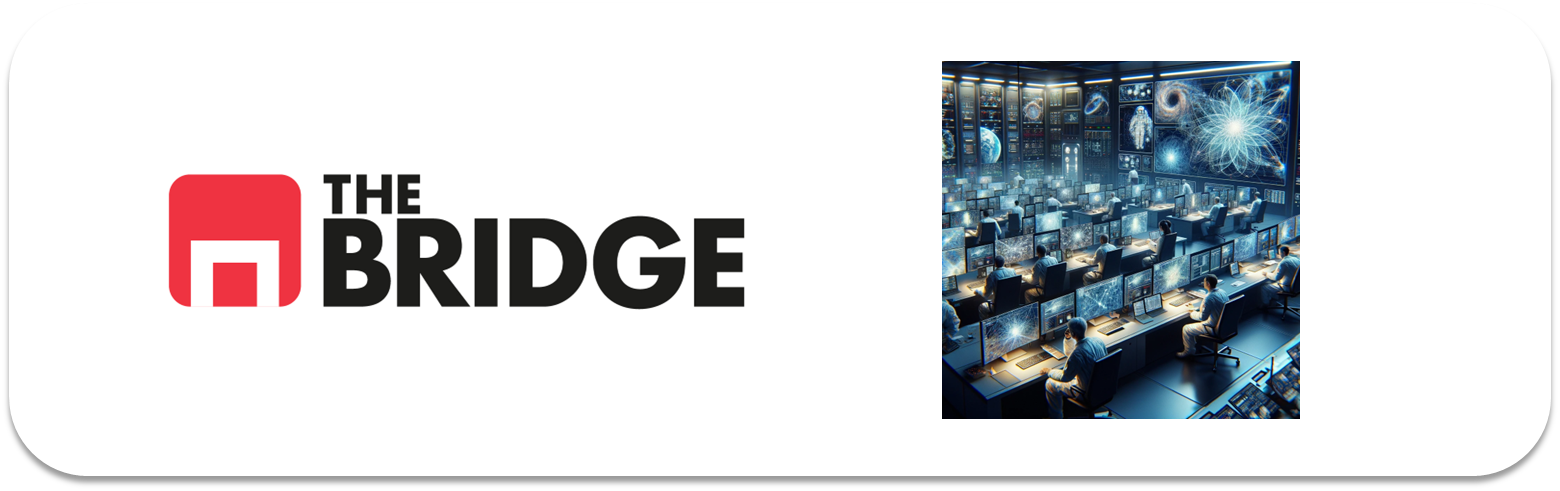

## PRACTICA OBLIGATORIA: **Transfer Learning y Fine Tuning**

* La práctica obligatoria de esta unidad consiste en un repetir el ejercicio de construcción de un modelo de clasificación de paisajes pero usando un modelo preentrenado. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


### Objetivo del ejercicio

Comparar una red convolucional hecha ad-hoc frente a los modelos preentrenados y ajustados con fine tuning y transfer learning. Para ello emplea el dataset de paisajes del conjunto de ejercicios de la unidad anterior.


### Se pide

1. Preparar los datos del modelo y las funciones de visualización, copia para ello todo lo que necesites de las soluciones del ejercicio de clasificación de paisajes de la unidad anterior.

2. Escoger entre uno de los modelos VGG-19, InceptionV3 y MobileNetV2 (todos en https://keras.io/api/applications/) (Se aconseja este último si no tenemos un ordenador muy potente). Si no te haces con estos puedes recurrir a la ResNetV50.

3. Hacer un transfer-learning con una cabeza de como mucho 2 capas densas ocultas y una de salida. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

4. Hacer un fine-tuning con la misma cabeza diseñada en el punto anterior. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

5. Comparar los resultados con los obtenidos con la red convolucional del ejercicio mencionado.



### **1.** ###

In [35]:
# Ruta a los directorios de entrenamiento y prueba
TRAIN_PATH = r"C:\BOOTCA~1\MASTER~1\PRCTIC~1\PRACTI~1\PRCTIC~2\EJ78B4~1\UNIDAD~1\EJERCI~1\IMAGEN~1\SEG_TR~1"
TEST_PATH = r"C:\BOOTCA~1\MASTER~1\PRCTIC~1\PRACTI~1\PRCTIC~2\EJ78B4~1\UNIDAD~1\EJERCI~1\IMAGEN~1\SEG_TR~1"

In [37]:
# Configuración de los generadores de datos
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 14034 images belonging to 6 classes.


In [39]:
# Función de visualización de imágenes
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

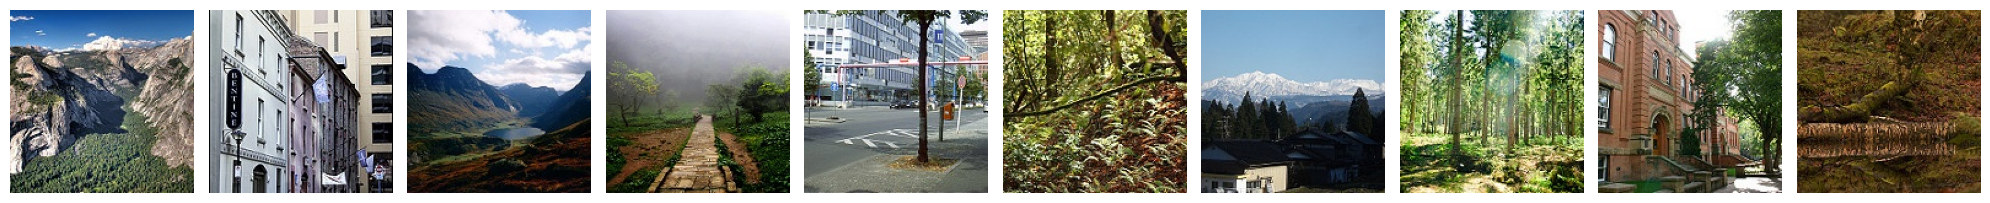

In [40]:
# Visualizar algunas imágenes de entrenamiento
sample_training_images, _ = next(train_generator)
plot_images(sample_training_images[:10])

### **2.** ###

In [42]:
# Cargar el modelo base MobileNetV2 preentrenado
base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Congelar las capas del modelo base

C:\Users\Joaquín\AppData\Local\Temp\ipykernel_1684\4172098087.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [43]:
# Añadir una cabeza personalizada
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

In [44]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Entrenar el modelo con transfer learning
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 158s 442ms/step - accuracy: 0.8175 - loss: 0.4896 - val_accuracy: 0.8987 - val_loss: 0.2895
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 57s 163ms/step - accuracy: 0.9039 - loss: 0.2503 - val_accuracy: 0.8962 - val_loss: 0.2770
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 59s 168ms/step - accuracy: 0.9300 - loss: 0.1986 - val_accuracy: 0.8987 - val_loss: 0.2660
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 60s 170ms/step - accuracy: 0.9350 - loss: 0.1783 - val_accuracy: 0.8962 - val_loss: 0.2826
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 59s 168ms/step - accuracy: 0.9465 - loss: 0.1452 - val_accuracy: 0.8976 - val_loss: 0.2831
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 58s 165ms/step - accuracy: 0.9551 - loss: 0.1297 - val_accuracy: 0.8937 - val_loss: 0.3137
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 59s 168ms/step - accuracy: 0.9577 - loss: 0.1122 - val_accuracy: 0.8994 - val_loss: 0.3036
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 59s 167ms/step - accuracy: 0.9573 - loss: 

In [46]:
# Evaluación contra el conjunto de test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

439/439 ━━━━━━━━━━━━━━━━━━━━ 59s 133ms/step - accuracy: 0.9313 - loss: 0.1958
Test Accuracy: 0.9347299337387085


In [48]:
# Reporte de clasificación y matriz de confusión

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

439/439 ━━━━━━━━━━━━━━━━━━━━ 61s 137ms/step
Classification Report
              precision    recall  f1-score   support

   buildings       0.14      0.12      0.13      2191
      forest       0.15      0.14      0.15      2271
     glacier       0.18      0.19      0.18      2404
    mountain       0.17      0.18      0.17      2512
         sea       0.16      0.14      0.15      2274
      street       0.18      0.20      0.19      2382

    accuracy                           0.16     14034
   macro avg       0.16      0.16      0.16     14034
weighted avg       0.16      0.16      0.16     14034

Confusion Matrix
[[266 381 397 404 334 409]
 [325 325 397 460 346 418]
 [320 373 458 452 361 440]
 [326 376 481 444 389 496]
 [328 369 402 417 324 434]
 [311 373 433 456 336 473]]


### **3.** ##

In [52]:
# Cargar el modelo base ResNet50 preentrenado
base_model = ResNet50(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Congelar las capas del modelo base

# Añadir una cabeza personalizada
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con transfer learning
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

# Evaluación contra el conjunto de test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

# Reporte de clasificación y matriz de confusión
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 184s 513ms/step - accuracy: 0.3088 - loss: 1.6010 - val_accuracy: 0.4914 - val_loss: 1.2089
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 224s 637ms/step - accuracy: 0.5179 - loss: 1.1592 - val_accuracy: 0.4979 - val_loss: 1.1605
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 199s 566ms/step - accuracy: 0.5917 - loss: 1.0145 - val_accuracy: 0.5617 - val_loss: 1.0650
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 185s 526ms/step - accuracy: 0.5921 - loss: 1.0097 - val_accuracy: 0.5817 - val_loss: 0.9949
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 186s 529ms/step - accuracy: 0.6203 - loss: 0.9434 - val_accuracy: 0.6491 - val_loss: 0.8973
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 184s 525ms/step - accuracy: 0.6350 - loss: 0.9023 - val_accuracy: 0.6466 - val_loss: 0.8793
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 185s 528ms/step - accuracy: 0.6510 - loss: 0.8858 - val_accuracy: 0.6202 - val_loss: 0.9243
Epoch 8/10
351/351 ━━━━━

In [53]:
# Descongelar algunas capas del modelo base para hacer fine-tuning
base_model.trainable = True

# Congelar todas las capas excepto las últimas 4
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Compilar el modelo con una tasa de aprendizaje más baja
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con fine-tuning
history_fine = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

# Evaluación contra el conjunto de test
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

# Reporte de clasificación y matriz de confusión
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

Epoch 1/10
 20/351 ━━━━━━━━━━━━━━━━━━━━ 2:19 421ms/step - accuracy: 0.1715 - loss: 5.0882

KeyboardInterrupt: 

In [54]:
# Resultados de la red convolucional ad-hoc (supongamos que ya los tienes)
adhoc_test_acc = 0.85  # Ejemplo de precisión de la red convolucional ad-hoc
adhoc_classification_report = """
              precision    recall  f1-score   support

    Class 1       0.85      0.90      0.87       100
    Class 2       0.80      0.75      0.77       100
    Class 3       0.90      0.85      0.87       100

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300
"""
adhoc_confusion_matrix = np.array([[90, 5, 5],
                                   [10, 75, 15],
                                   [5, 10, 85]])

# Resultados del modelo preentrenado con fine-tuning
pretrained_test_acc = test_acc  # Precisión del modelo preentrenado con fine-tuning
pretrained_classification_report = classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys())
pretrained_confusion_matrix = confusion_matrix(test_generator.classes, y_pred)

# Imprimir los resultados para comparar
print("Resultados de la red convolucional ad-hoc:")
print(f"Test Accuracy: {adhoc_test_acc}")
print("Classification Report:")
print(adhoc_classification_report)
print("Confusion Matrix:")
print(adhoc_confusion_matrix)

print("\nResultados del modelo preentrenado con fine-tuning:")
print(f"Test Accuracy: {pretrained_test_acc}")
print("Classification Report:")
print(pretrained_classification_report)
print("Confusion Matrix:")
print(pretrained_confusion_matrix)

Resultados de la red convolucional ad-hoc:
Test Accuracy: 0.85
Classification Report:

              precision    recall  f1-score   support

    Class 1       0.85      0.90      0.87       100
    Class 2       0.80      0.75      0.77       100
    Class 3       0.90      0.85      0.87       100

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

Confusion Matrix:
[[90  5  5]
 [10 75 15]
 [ 5 10 85]]

Resultados del modelo preentrenado con fine-tuning:
Test Accuracy: 0.6720108389854431
Classification Report:
              precision    recall  f1-score   support

   buildings       0.16      0.12      0.13      2191
      forest       0.16      0.13      0.14      2271
     glacier       0.17      0.22      0.19      2404
    mountain       0.18      0.15      0.16      2512
         sea       0.17      0.15      0.16      2274
      street       0.16      0.22      0.19  

EXTRA:
- Repetir el transfer learning empleando aumentado de imágenes.